In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [19]:
X, y = make_regression(n_samples=600, n_features=4, noise=1, random_state=42)

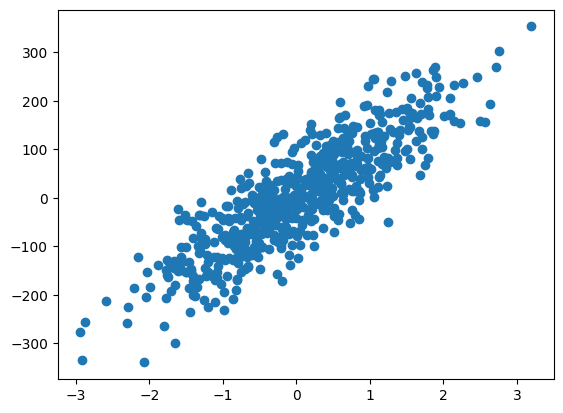

In [ ]:
plt.scatter(X[:,1],y)

In [46]:
np.random.seed(43)
w = np.random.randn()
w


0.25739992534469325

In [60]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Epoch 1/1000, MSE: 29353.3660
Epoch 2/1000, MSE: 28142.8346
Epoch 3/1000, MSE: 26982.4582
Epoch 4/1000, MSE: 25870.1503
Epoch 5/1000, MSE: 24803.9114
Epoch 6/1000, MSE: 23781.8256
Epoch 7/1000, MSE: 22802.0571
Epoch 8/1000, MSE: 21862.8465
Epoch 9/1000, MSE: 20962.5078
Epoch 10/1000, MSE: 20099.4255
Epoch 11/1000, MSE: 19272.0514
Epoch 12/1000, MSE: 18478.9019
Epoch 13/1000, MSE: 17718.5553
Epoch 14/1000, MSE: 16989.6490
Epoch 15/1000, MSE: 16290.8774
Epoch 16/1000, MSE: 15620.9894
Epoch 17/1000, MSE: 14978.7857
Epoch 18/1000, MSE: 14363.1174
Epoch 19/1000, MSE: 13772.8831
Epoch 20/1000, MSE: 13207.0275
Epoch 21/1000, MSE: 12664.5393
Epoch 22/1000, MSE: 12144.4491
Epoch 23/1000, MSE: 11645.8280
Epoch 24/1000, MSE: 11167.7859
Epoch 25/1000, MSE: 10709.4694
Epoch 26/1000, MSE: 10270.0611
Epoch 27/1000, MSE: 9848.7772
Epoch 28/1000, MSE: 9444.8667
Epoch 29/1000, MSE: 9057.6099
Epoch 30/1000, MSE: 8686.3168
Epoch 31/1000, MSE: 8330.3265
Epoch 32/1000, MSE: 7989.0052
Epoch 33/1000, MSE: 766

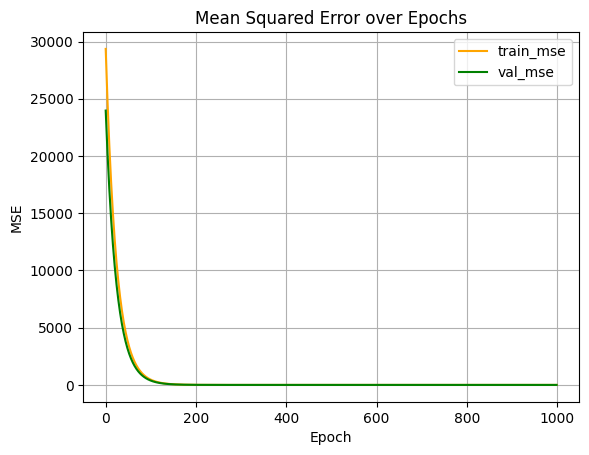

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate data
X, y = make_regression(n_samples=600, n_features=5, noise=1, random_state=42)


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


epochs = 1000
lr = 0.01
n_samples, n_features = X_train.shape
weights = np.zeros(n_features)
error_logs = []
val_error_logs=[]

# Gradient Descent Loop
for epoch in range(epochs):
    y_pred = np.dot(X_train,weights)
    error = y_train - y_pred

    val_pred = np.dot(X_val,weights)
    val_error = y_val - val_pred

    gradients = -2 * np.dot(X_train.T, error) / n_samples
    weights = weights - lr * gradients

    mse = np.mean(error**2)
    val_mse = np.mean(val_error**2)

    error_logs.append(mse)
    val_error_logs.append(val_mse)
    
    print(f"Epoch {epoch+1}/{epochs}, MSE: {mse:.4f}")


plt.plot(error_logs,color='orange',label='train_mse')
plt.plot(val_error_logs,color='green',label='val_mse')
plt.title("Mean Squared Error over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.show()

In [143]:
weights

array([43.12527693, 26.01258131, 97.0259112 , 98.35594983, 81.8340101 ])

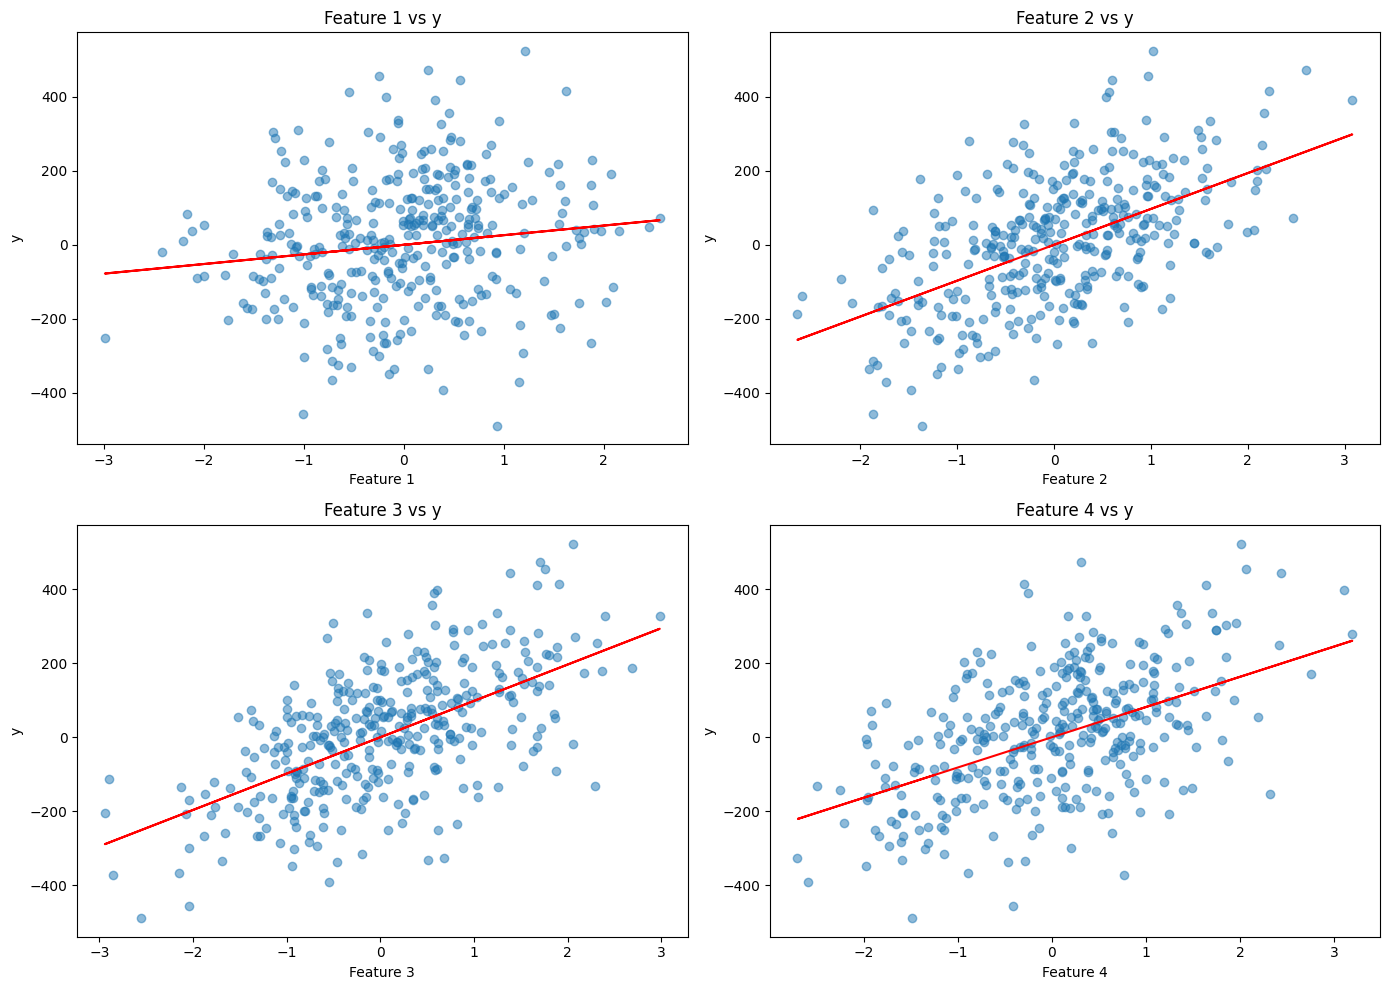

In [144]:
fig, axes = plt.subplots(2, (int)(n_features/2), figsize=(14, 10))

feature_indices = [1, 2, 3, 4] 

for idx, feature_idx in enumerate(feature_indices):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    ax.scatter(X_train[:, feature_idx], y_train, alpha=0.5)
    y_vals = np.dot(X_train[:, feature_idx],weights[feature_idx])
    ax.plot(X_train[:,feature_idx],y_vals,color='red')
    ax.set_xlabel(f'Feature {feature_idx}')
    ax.set_ylabel('y')
    ax.set_title(f'Feature {feature_idx} vs y')

plt.tight_layout()
plt.show()

In [145]:
test_pred = np.dot(X_test,weights)
test_error = y_test - test_pred
test_mes = np.mean(test_error**2)
test_mes


np.float64(1.0518279323488795)